In [101]:
import os, glob
from sklearn import preprocessing
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [102]:
dataset_path = os.getcwd() + '/orl_faces/' #path to the dataset
namefile = cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml'


In [61]:
folderdata  = os.getcwd() + '/testing/diperkecil/'
for folder in glob.glob(folderdata + '/*'):
    for image in glob.glob(folder + '/*'):
        print(image)
        imgcropt  = cv2.imread(image)
        graycropt  = cv2.cvtColor(imgcropt, cv2.COLOR_BGR2GRAY)
        face_cascade = cv2.CascadeClassifier(namefile)
        facescropt = face_cascade.detectMultiScale(graycropt , 1.1, 4)

        for (x, y, w, h) in facescropt:
            cv2.rectangle(imgcropt, (x, y), (x+w, y+h), 
                        (0, 0, 255), 2)
            
            facescropt = imgcropt[y:y + h, x:x + w]
            cv2.imwrite(image, facescropt)

e:\skripsi\pake - Face-Recognition-Eigenface-Scratch-master/testing/diperkecil\s5\2.jpg
e:\skripsi\pake - Face-Recognition-Eigenface-Scratch-master/testing/diperkecil\s5\4.jpg
e:\skripsi\pake - Face-Recognition-Eigenface-Scratch-master/testing/diperkecil\s5\WhatsApp Image 2022-07-22 at 05.31.59.jpeg


In [103]:
#function to plot the images
def plot_portraits(images, titles, h, w, n_row, n_col):
    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
        

In [104]:
#to get the total number of images
total_images = 0
shape = None
for images in glob.glob(dataset_path + '/**', recursive=True):
    if images[-3:] == 'pgm' or images[-3:] == 'jpg':
        total_images += 1

print(total_images)

4


[[ 37 100  68]
 [144 163 145]
 [107  93 112]]
[[169 120  51]
 [192 139  77]
 [150  74 144]]
[[ 98 183  54]
 [143 211 170]
 [124 120 126]]
[[ 25  93 129]
 [ 99 135 142]
 [ 42 103 124]]


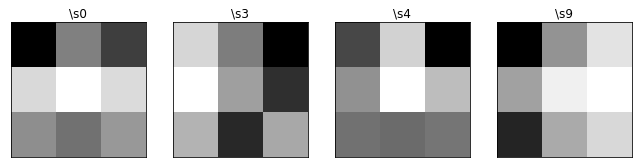

In [121]:
shape = (3,3) #size of the images (112,92)
all_images = np.zeros((total_images, shape[0], shape[1]) ,dtype='float64') #initialize the numpy array
names = list()
i = 0
for folder in glob.glob(dataset_path + '/*'): #iterate through all the class
    for _ in range(1): #makes 10 copy of each class name in the list (since we have 10 images in each class)
        names.append(folder[-3:].replace('/', '')) #list for the classes of the faces
    for image in glob.glob(folder + '/*'): #iterate through each folder (class)
        read_image = cv2.imread(image, cv2.IMREAD_GRAYSCALE) #read the image in grayscale
        resized_image = cv2.resize(read_image, (shape[1], shape[0])) #cv2.resize resizes an image into (# column x # height)
        all_images[i] = np.array(resized_image)
        i += 1
        print(resized_image)       
        

plot_portraits(all_images, names, 3,3, 1, 4) #plot 20 of the images

[[-45.25 -24.    -7.5   -0.5    1.    11.5    1.25  -4.5  -14.5 ]
 [ 86.75  -4.   -24.5   47.5  -23.   -56.5   44.25 -23.5   17.5 ]
 [ 15.75  59.   -21.5   -1.5   49.    36.5   18.25  22.5   -0.5 ]
 [-57.25 -31.    53.5  -45.5  -27.     8.5  -63.75   5.5   -2.5 ]]


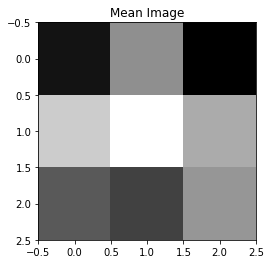

In [106]:
A = np.resize(all_images, (total_images, shape[0]*shape[1])) #convert the images into vectors. Each row has an image vector. i.e. samples x image_vector matrix
np.set_printoptions(threshold=np.inf)

mean_vector = np.sum(A, axis=0, dtype='float64')/total_images #calculate the mean vector
mean_matrix = np.tile(mean_vector, (total_images, 1)) #make a 400 copy of the same vector. 400 x image_vector_size matrix.
A_tilde = A - mean_matrix #mean-subtracted image vectors
print(A_tilde)
plt.imshow(np.resize(mean_vector, (shape[0],shape[1])), cmap='gray') #show the mean image vector
plt.title('Mean Image')
plt.show()


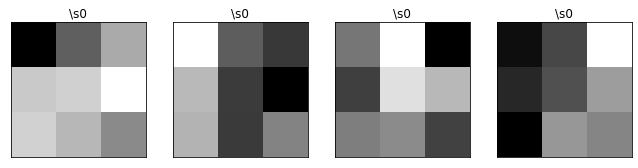

In [107]:
plot_portraits(A_tilde, names, 3,3, 1, 4) # matrix A_tilde that contains vectors of each mean subtracted img

In [108]:
L = (A_tilde.dot(A_tilde.T))/total_images #since each row is an image vector (unlike in the notes, L = (A_tilde)(A_tilde.T) instead of L = (A_tilde.T)(A_tilde)

# print(L)
eigenvalues, eigenvectors = np.linalg.eig(L) #find the eigenvalues and the eigenvectors of L
print(eigenvalues)
print(eigenvectors)
idx = eigenvalues.argsort()[::-1] #get the indices of the eigenvalues by its value. Descending order.

eigenvalues = eigenvalues[idx] 

eigenvectors = eigenvectors[:, idx] #sorted eigenvalues and eigenvectors in descending order


[7.10251081e+03 7.81131022e-14 6.34619465e+02 2.96799473e+03]
[[-0.21003611  0.5         0.84015753  0.00449064]
 [ 0.70313222  0.5        -0.12440214  0.49002978]
 [ 0.16571279  0.5        -0.25179623 -0.8118731 ]
 [-0.65880891  0.5        -0.46395915  0.31735268]]


In [109]:

eigenvectors_C = A_tilde.T @ eigenvectors #linear combination of each column of A_tilde
eigenvectors_C.shape #each column is an eigenvector of C where C = (A_tilde.T)(A_tilde). NOTE : in the notes, C = (A_tilde)(A_tilde.T)


(9, 4)

In [110]:
#normalize the eigenvectors
eigenfaces = preprocessing.normalize(eigenvectors_C.T) #normalize only accepts matrix with n_samples, n_feature. Hence the transpose.
print(eigenfaces)
eigenfaces.shape
print(eigenfaces.shape)

[[ 0.65752481  0.19239354 -0.3231069   0.37514084  0.05651458 -0.24736312
   0.45015204 -0.09180125  0.10035137]
 [ 0.1041812  -0.54889045  0.2055297   0.09225918 -0.54714811 -0.50084073
  -0.12260148 -0.25750707  0.07455089]
 [-0.52027434 -0.39972396 -0.44978238  0.30086661  0.07721384  0.07058523
   0.40742693 -0.18010824 -0.25948128]
 [-0.65013521 -0.64487558  0.12668832 -0.07546416 -0.26801212 -0.03704604
  -0.11731247 -0.16602116 -0.15870342]]
(4, 9)


[0, 1, 2, 3]


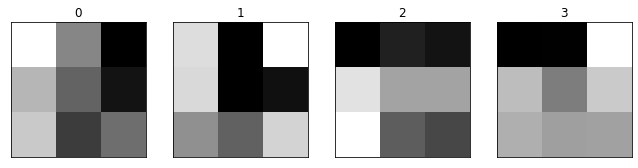

In [111]:
#to visualize some of the eigenfaces
eigenface_labels = [x for x in range(eigenfaces.shape[0])] #list containing values from 1 to number of eigenfaces
print(eigenface_labels)
plot_portraits(eigenfaces, eigenface_labels , 3,3, 1, 4) 

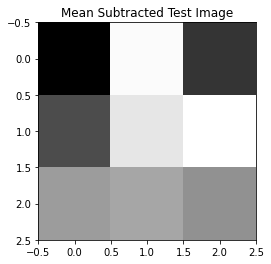

In [112]:
test_img = cv2.imread('absent/Absent_b2612752-4428-483d-b09b-2612bca42dcc2207202255.jpg', cv2.IMREAD_GRAYSCALE) #testing image
test_img = cv2.resize(test_img, (shape[1],shape[0])) #resize the testing image. cv2 resize by width and height.
mean_subracted_testimg = np.reshape(test_img, (test_img.shape[0]*test_img.shape[1])) - mean_vector #subtract the mean
plt.imshow(np.reshape(mean_subracted_testimg, (3,3)), cmap='gray')
plt.title("Mean Subtracted Test Image")
plt.show()

In [113]:
q = 350 #number of chosen eigenfaces
omega = eigenfaces[:q].dot(mean_subracted_testimg) #the vector that represents the image with respect to the eigenfaces.
omega.shape


(4,)

[ 10.17428052  78.47330837 -25.38979841  -7.28611953  65.41991243
  53.21281398  15.64886276  32.37299793  -2.5331153 ]


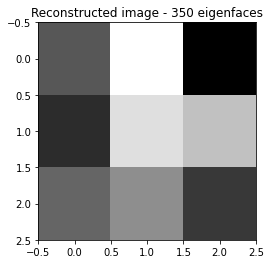

In [114]:
#To visualize the reconstruction
reconstructed = eigenfaces[:q].T.dot(omega) #image reconstructed using q eigenfaces.
reconstructed.shape
print(reconstructed)
plt.imshow(np.reshape(reconstructed, (shape[0],shape[1])), cmap='gray')
plt.title("Reconstructed image - "+str(q)+" eigenfaces")
plt.show()

In [115]:
alpha_1 = 3000 #chosen threshold for face detection

projected_new_img_vector = eigenfaces[:q].T @ omega #n^2 vector of the new face image represented as the linear combination of the chosen eigenfaces

diff = mean_subracted_testimg - projected_new_img_vector 
beta = math.sqrt(diff.dot(diff)) #distance between the original face image vector and the projected vector.
print(beta)
if beta < alpha_1:
    print("Face detected in the image! ", beta)
else:
    print("No face detected in the image! ", beta)

56.608460536576175
Face detected in the image!  56.608460536576175


In [122]:
alpha_2 = 3000 #chosen threshold for face recognition
smallest_value = None #to keep track of the smallest value
index = None #to keep track of the class that produces the smallest value
for k in range(total_images):
    omega_k = eigenfaces[:q].dot(A_tilde[k]) #calculate the vectors of the images in the dataset and represent
    diff = omega - omega_k
    epsilon_k = math.sqrt(diff.dot(diff))
    print(math.sqrt(diff.dot(diff))," ",k)
    if smallest_value == None:
        smallest_value = epsilon_k
        index = k
    if smallest_value > epsilon_k:
        smallest_value = epsilon_k
        index = k
        # presentage = (epsilon_k/math.sqrt(omega.dot(omega)))*100
        # print(epsilon_k)  
        # print(math.sqrt(omega.dot(omega)))

# omega_test_img = math.sqrt(mean_vector.dot(mean_vector))
# print(presentage)
# presentage = (1-(smallest_value/omega_test_img))*100
# print(abs(presentage))
print(names)
if smallest_value < alpha_2:
    print(smallest_value, names[index])
else:
    print(smallest_value, "Unknown Face!")

141.27026316883652   0
198.29456602814494   1
49.6760049805708   2
211.369458468104   3
['\\s0', '\\s3', '\\s4', '\\s9']
49.6760049805708 \s4
